# <span style="color:red"><center>Regresión Lineal Bayesiana<center></span>


<figure> 
<center>
<img src="https://github.com/Jeslome/Proyecto/blob/main/Bayesiana/Imagenes/willem-van-de-velde-94074_960_720.jpg?raw=true"  width="800" height="800" align="center"/>
<figcaption> </figcaption>
</center>
</figure>

[Fuente:pixabay](https://pixabay.com/es/photos/willem-van-de-velde-arte-cuadro-94074/)


## <span style="color:blue">Referencias</span>
Notas de clase profesor Juan Camilo Sosa


Cuadernos de aprendizaje profundo sobre estadìstica bayesiana y regresiòn bayesiana


## <span style="color:blue">Profesor</span>
1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co

## <span style="color:blue">Introducción</span>

La regresión lineal Bayesiana se  refiere a un tipo de regresión lineal  que se basa en la estadística bayesiana, es decir, en el teorema de Bayes.Por lo tanto, es un tipo de modelado condicional en el que la media de una variable se describe mediante una combinación lineal de otras variables, con el objetivo de obtener la probabilidad posterior de los coeficientes de regresión (así como otros parámetros que describen la distribución de la regresora) y, en última instancia, permitir la predicción fuera de la muestra del regresor (a menudo etiquetado como y) condicional a los valores observados de los regresores (generalmente X). La versión más simple y más utilizada de este modelo es el modelo lineal normal, en el que $y|X$ distribuye Normal. [Wikipedia](https://en.wikipedia.org/wiki/Bayesian_linear_regression)

## <span style="color:blue">Nota Histórica</span>

Las aportaciones de Turing a la estadística Bayesiana se desarrollaron en relación con el algoritmo “bamburismus” que sirvió para desencriptar los mensajes enviados por la armada naval germana, durante la segunda guerra mundial, usando la máquina Enigma. Dichos mensajes eran de capital importancia para la población británica cuyo abastecimiento dependía de manera crítica de la supervivencia de los convoyes marítimos aliados.

El famoso estadístico Bayesiano, Irwing J. Good, quien a principios de los años 40 del siglo pasado trabajaba como ayudante de Turing en Bletchley Park, explica en un artículo publicado en Biometrika (I. J. Good, 1979) las aportaciones metodológicas de Turing a la teoría Bayesiana, tanto al denominado peso de la evidencia como a la introducción de un test de hipótesis basado en la razón de verosimilitudes con el que confrontar hipótesis nulas y alternativas.  Gracias a recientes desclasificaciones de documentos relacionados con el “bamburismus” por parte del gobierno americano, conocemos que dicho algoritmo se fundamenta en el test de hipótesis diseñado por Turing.[Fuente:blog el pais](https://blogs.elpais.com/turing/2012/12/alan-turing-y-la-estadistica-bayesiana.html)



<figure> 
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Part_of_a_Banbury_Sheet_as_used_in_Banburismus.jpg/800px-Part_of_a_Banbury_Sheet_as_used_in_Banburismus.jpg"  width="600" height="600" align="center"/>
<figcaption> </figcaption>
</center>
</figure>

[Fuente:Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Part_of_a_Banbury_Sheet_as_used_in_Banburismus.jpg/800px-Part_of_a_Banbury_Sheet_as_used_in_Banburismus.jpg)

## <span style="color:blue">Conceptos previos</span>

**Conjunto de parámetros:$\theta$** es el ente de interés para usted. Este suele ser un vector, una matriz,o un arreglo de números reales, sin embargo, pueden ser imágenes, textos etc. Es importante anotar que los parámetros no son observables.

**Distribución previa, p($\theta$):** Es el estado de información de $\theta$ antes de que se observen los datos en $y$.

**Distribución muestral, p($y|\theta$):** Es el mecanismo aleatorio que caracteriza completamente cómo se genera $y$  dado un valor específico de $\theta$.

**Distribución posterior: p($\theta|y$):** Es el estado de información actualizada acerca de $\theta$ después de que se ha observado $y$.

## <span style="color:blue">Fundamento Matemático</span>


### <span style="color:#4CC9F0">Teorema de Bayes</span>


En la teoría de la probabilidad, es una proposición planteada por el matemático inglés Thomas Bayes (1702-1761) y publicada póstumamente en 1763, que expresa la probabilidad condicional de un evento aleatorio A dado B en términos de la distribución de probabilidad condicional del evento B dado A y la distribución de probabilidad marginal de solo A.

Sea $\{A_1,A_2,...,A_n\}$ donde $P(A_i)\neq 0$. Si se conoce $P(B|A_i)$ entonces:

$$P(A_i|B)=\frac{P(B|A_i)P(A_i)}{P(B)}$$


Cuando se define $P(A1B)$ nos referimos a la evidencia o cantidad de información   a favor del estatus verdadero de la proposición A basado en su estado de información actual B.

En términos de $\theta$ y $y$ lo anterior de puede reescribir de la siguiente forma:

$$p(\theta|y)=\frac{p(\theta , y)}{p(y)}=\frac{p(y|\theta)p(\theta)}{\int_{\Theta}p(y|\theta)p(\theta)d \theta} \propto p(y|\theta)p(\theta)$$

Donde $\Theta$ es el conjunto de todos los posibles valores que puede asumir $\theta$.

**Ejemplo de aplicación del teorema de Bayes**


 Suponga que el $5\%$ de  la población de Bogotá tiene una enfermedad. La probabilidad de que el individuo elegido de entre la gente padezca la enfermedad es de $0.05$. Suponga que la evidencia histórica muestra que si una persona padece realmente la enfermedad, la probabilidad de que la prueba indique la presencia de la enfermedad en una persona que en realidad no la padece es de $0.15$. Elija al azar a una persona de Bogotá y aplique la prueba. Los resultados de la prueba indican que la enfermedad está presente. ¿Cuál es la probabilidad de que la persona en realidad padezca la enfermedad?

**Solución**

Sean: $A_1$ el evento "padece la enfermedad", $A_2$ el evento "no padece la enfermedad".

$$P(A_1)=0.05---> \textbf{Probabilidad a priori}$$
$$P(A_2)=1-0.05=0.95$$
$$P(B|A_1)=0.9$$
$$P(B|A_2)=0.15$$

*Probabilidad a posteriori*

$$P(A_1|B)=\frac{P(A_1)P(B|A_1)}{P(A_1)P(B|A_1)+P(A_2)P(B|A_2)}=\frac{(0.5)(0.9)}{(0.05)(0.9)+(0.95)(0.15)}=\frac{0.045}{0.1875}=0.24$$


## <span style="color:blue">Modelo</span>

En la estadística Bayesiana se supone que tanto parámetros ($\mathbf{\theta}$) como observaciones ($\mathbf{y}$) son variables aleatorias. Cuando se realiza un experimento de tipo estadístico, las observaciones se convierten en datos que podemos ver. Por otro lado, los parámetros se convierten en cantidades (parámetros numéricos) que no podemos observar directamente. Solamente podemos **inferir** el valor del parámetro a partir de los datos. Nótese que datos y los *parámetros numéricos* en el experimento son realizaciones de variables aleatorias. Los parámetros puede ser llamados variables latentes, en el sentido que están presentes y determinan las observaciones, pero no pueden ser observadas directamente.


[Fuente:AP](https://github.com/AprendizajeProfundo/Estadistica-Bayesiana/blob/master/cuadernos/Introducci%C3%B3n_Estadistica_Bayesiana.ipynb)


En el enfoque bayesiano, los datos se complementan con información adicional en forma de una distribución de probabilidad previa. La creencia previa sobre los parámetros se combina con la función de probabilidad de los datos de acuerdo con el teorema de Bayes para producir la creencia posterior sobre los parámetros. Lo anterior puede tomar diferentes formas funcionales dependiendo del dominio y de la información de la que se disponga a priori.

### <span style="color:#4CC9F0"> Distribuciones a priori no informativas</span>

La formulación de $p(\theta)$ es muy importante puesto que la distribución previa es un resumen de lo que sabe y no sabe acerca de $\theta$ externo al conjunto de datos $y$.
Se recomienda entonces emplear distribuciones previas difusas (distribuciones que asignan probabilidad uniformemente en el espacio de parámetros ) cuando no se tenga acceso a la información a priori de $\theta$.

### <span style="color:#4CC9F0">Distribución predictiva posterior</span>

La distribución predictiva es la distribución de observaciones futuras dada la muestra actual.

Supongamos que $ y_ {n + 1} $ es una observación futura que es independiente de los datos observados $ \mathbf{y}$, dado el correspondiente parámetro $\boldsymbol{\theta}$. 


Entonces, la distribución predictiva para $ y_{n + 1} $ viene dada por

$$
\begin{equation*}
p(y_{n+1}|\mathbf{y}).
\end{equation*}
$$

Observe que

$$
\begin{align*}
p(y_{n+1}|\mathbf{y})&=\int
p(y_{n+1},\mathbf{\theta}|\mathbf{y})d\mathbf{\theta}\\
&= \int
f(y_{n+1}|\mathbf{\theta},\mathbf{y})p(\mathbf{\theta}|\mathbf{y})d\mathbf{\theta}\\
&=\int
f(y_{n+1}|\mathbf{\theta})p(\mathbf{\theta}|\mathbf{y})d\mathbf{\theta}
\end{align*}
$$

Es decir que

$$
\begin{equation*}
p(y_{n+1}|\mathbf{y}) = \int
f(y_{n+1}|\mathbf{\theta})p(\mathbf{\theta}|\mathbf{y})d\mathbf{\theta},
\end{equation*}
$$

y en consecuencia los valores predichos pueden ser calculados dentro del algorimo de muestreo.  Supongamos que en el paso $m$ después de convergencia se tiene que la muestra para $\boldsymbol{\theta}$ es $\boldsymbol{\theta}^{(m)}$. Entonces un valor predictivo puede ser obtenido a partir de la densidad posterior
predictiva

$$
\begin{equation*}
f(y|\mathbf{\theta}^{(m)})
\end{equation*}
$$

Dentro del algoritmo de muestreo se procede así: en el paso $m$

1. Se obtiene la muestra $\mathbf{\theta}^{(m)} \sim p(\mathbf{\theta}|\mathbf{y})$ (sección *model* de Stan).
2. Se obtiene el valor predicho $y_{n+1} \sim f(y|\mathbf{\theta}^{(m)})$ (sección *generated quantities* de Stan).

Observe que en el numeral 2, se está usando la función de verosimilitud (que es una densidad) con parámetro $\mathbf{\theta}^{(m)}$.

Cada observación $y_i$ en el caso de los modelos de regresión  depende no solamente del parámetro $\mathbf{\theta}$, sino también de un vector de variables regresoras o predictoras $\mathbf{x}_i$. En este caso tenemos que la posterior predictiva es dada por 

$$
\begin{equation*}
p(y_{n+1}|\mathbf{y},x_{n+1}) = \int
f(y_{n+1}|\mathbf{\theta},x_{n+1})p(\mathbf{\theta}|\mathbf{y})d\mathbf{\theta},
\end{equation*}
$$


[Fuente:AP](https://github.com/AprendizajeProfundo/Estadistica-Bayesiana/blob/master/cuadernos/Distribucion_posterior_predictiva.ipynb)



### <span style="color:#4CC9F0">Media Posterior, E($\theta | y$):</span>

Utilizando familias conjugadas, la media posterior se puede expresar como un promedio ponderado de la media previa y la media muestral con pesos proporcionales al tamaño de la muestra previa y el tamaño de la muestra observado.

## <span style="color:blue">Familias conjugadas</span>

Consiste en encontrar una familia de distribuciones **P** de tal forma que el producto de los miembros de esta familia con la distribución muestral también sea parte de **P**.

La familias: Beta Binomial, Gamma Poisson, Gamma Inversa normal normal son sólo algunas de las familias conjugadas que se utilizan en estadística Bayesiana. 
 
 Veamos la familia Gamma Poisson  como una forma de ejemplicar su funcionamiento.

### <span style="color:#4CC9F0"> Modelo Gamma Poisson</span>

### <span style="color:violet">Modelo Poisson</span>

La distribución de Poisson es el equivalente discreto de la distribución normal. Esta distribución se usa en situaciones de conteo asociadas a la ocurrencia de un evento en unidades del espacio o del tiempo. 

La distribución tiene un parámetro real positivo, usualmente denotado por $\theta$. Este parámetro puede interpretarse como la rata de ocurrencia del evento contabilizado por unidad de espacio o tiempo. 

La distribución muestral (distribución condicional conjunta) de $y=(y_1,y_2,...,y_n)$ dado $\theta$ es:

$$p(y|\theta)=\frac{\theta^s e^{-n\theta}}{\prod_{i=1}^{n}y_{i}!} $$

$\prod_{i=1}^{n}y_{i}!$ es la constante normalizadora.

$s=\sum_{i=1}^{n} y_i$, lo cual indica que $s$ es un estadístico suficiente para $\theta$.

$$p(\theta|y)\propto \theta ^{s} e^{-n\theta}p(\theta) $$
$$s|\theta \sim Poisson (n\theta)$$
$$\theta \sim p(\theta)$$

Veamos a continuación como generar diferentes funciones de densidad de la distribución Poisson conforme varía el parámetro $\theta$.

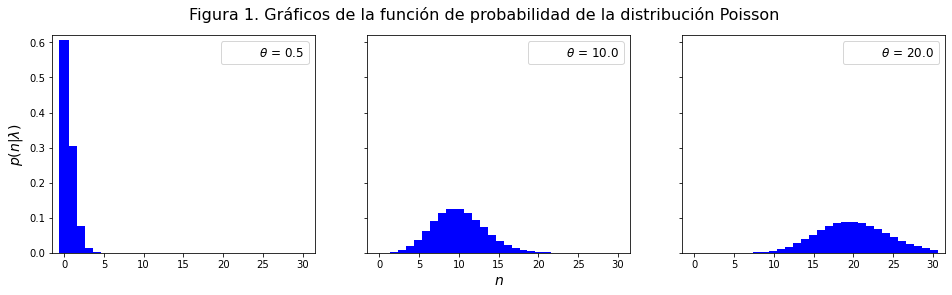

In [1]:
# gráficos de la distribución Poisson
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

theta_params = [0.5, 10, 20 ]

x = np.arange(poisson.ppf(0.01, np.min(theta_params)),
              poisson.ppf(0.99, np.max(theta_params)))
n_row = 1
n_col = 3
fig, ax = plt.subplots(n_row, n_col, sharex = True, sharey = True, figsize=(16,4))

for i in range(3):
    theta = theta_params[i]
    y  = poisson.pmf(x, theta)
    ax[i].vlines(x,0,y,colors='b', lw=10)
    ax[i].set_ylim(0,0.62)
    ax[i].plot(0,0, label = "$\\theta$ = {:3.1f}".format(theta), alpha=0 )
    ax[i].legend(fontsize=12)
    
ax[1].set_xlabel('$n$', fontsize = 14)
ax[0].set_ylabel('$p(n|\\lambda)$',fontsize=14)
fig.suptitle('Figura 1. Gráficos de la función de probabilidad de la distribución Poisson',fontsize=16)
plt.show()

### <span style="color:violet">Distribución Gamma</span>


Esta distibución es continua y tiene soporte en los números reales positivos. Tiene dos parámetros reales postivos: una parámetro de forma $\alpha$ y un parámetro de escala $\beta$. La función de densidad de probabilidad (fdp) esta dada por

$$f(x|\alpha,\beta) = Gamma(x;\alpha,\beta) = \frac{\beta^{\alpha}}{\Gamma(\alpha) }x^{\alpha-1}e^{-x\beta}, \hspace{3mm} \alpha,\beta,x >0.$$

La figura 2 muestra el gráfico de la función de densidad de la distribución Gamma para diferentes valores de los parámetros.



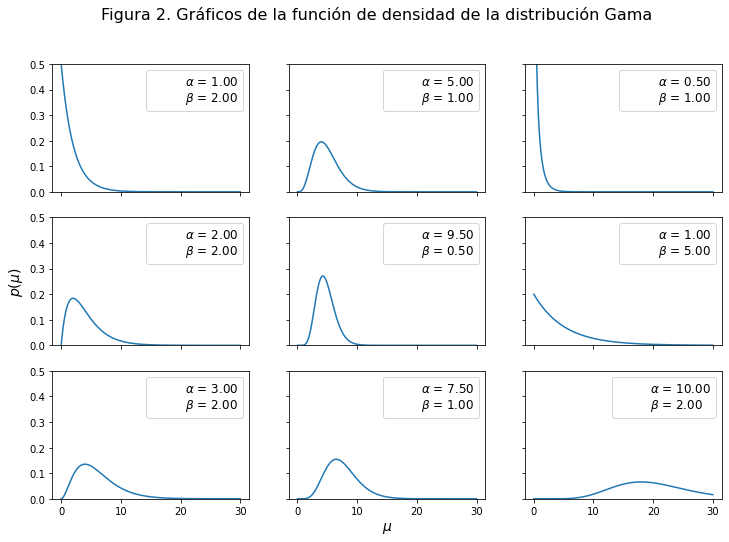

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma

alpha_params = [1.0, 2.0, 3.0, 5.0, 9.5, 7.5, 0.5, 1.0, 10.0]
beta_params  = [2.0, 2.0, 2.0, 1.0, 0.5, 1.0, 1.0, 5.0, 2.0]


idx = np.arange(9)

row = np.array([0,0,0,1,1,1,2,2,2])
col = np.array([0,1,2,0,1,2,0,1,2])
x = np.linspace(0,30,200)
              
fig, ax = plt.subplots(3, 3,sharex = True, sharey = True, figsize=(12,8))
for i in idx:
    alpha = alpha_params[i]
    beta  = beta_params[i]
    y = gamma.pdf(x, alpha, loc=0, scale=beta)
    ax[col[i],row[i]].set_ylim(0,0.5)
    ax[col[i],row[i]].plot(x,y)
    ax[col[i],row[i]].plot(0, 0, label="$\\alpha$ = {:3.2f}\n$\\beta$ = {:3.2f}".format(alpha, beta), alpha=0)
    ax[col[i],row[i]].legend(fontsize=12)
ax[2,1].set_xlabel('$\\mu$', fontsize=14)
ax[1,0].set_ylabel('$p(\\mu)$', fontsize=14)
fig.suptitle('Figura 2. Gráficos de la función de densidad de la distribución Gama',fontsize=16)
plt.show()
    

### <span style="color:violet">Modelo Gamma Poisson</span>


Conforme  a la definición de la distribución Gamma note que:

$$\theta \sim Gamma (a,b)$$

$$ Gamma(x;a,b) = \frac{b^{a}}{\Gamma(a) }x^{a-1}e^{-b x}, \hspace{3mm} a,b,x >0.$$

Dado que el parámetro de la distribución Poisson es un número real positivo, una posible distribución a priori que puede generar tal parámetro es la distribución Gamma. En tal caso, la distribución posterior también es una distribución Gamma, como se muestra a continuación. Sean $\mathbf{y}= \{y_1, \ldots,y_n\}$ observaciones provenientes de la distribución $Poisson(\theta)$. Entonces la verosimilitud $p( \mathbf{y}|\theta)$ está dada por

$$p(\mathbf{y}|\theta) = \prod_{i=1}^{n} Poisson(y_i;\theta) \propto \theta^{s} e^{-n\theta}$$
 
Por lo tanto la posterior tiene la forma

$$p(\theta|\boldsymbol{y}) \propto p(\mathbf{y}|\theta)p(\theta)= \left[\theta^{s} e^{-n\theta}\right] \theta^{a-1}e^{-b \theta}  = \theta^{s +a -1 } e^{-(n+b)\theta},$$

Así entonces, la distribución posterior está dada por:

$$p(\theta|\boldsymbol{y}) = Gamma\left(s +a, n+b\right)$$.

Observe que $a$ y $b$ son los hiperparámetros de este modelo. Recuerde que $s=\sum_{i=1}^{n} y_i$.

### <span style="color:violet">Media posterior</span>


Como la distribición posterior  es Gamma($a+s,b+n$) la media posterior está definida de la siguiente manera:

$$E(\theta|y)=\frac{a+s}{b+n}=\frac{b}{b+n}\frac{a}{b}+\frac{n}{b+n}\frac{s}{n}$$

Esto corresponde a un promedio ponderado del valor esperado previo y la media muestral.

### <span style="color:violet">Predictiva  posterior</span>

Por medio de la distribución predictiva posterior se caracterizan diversos aspectos de una observación futura  como la varianza predictiva. Para este  caso:

$$y*|y \sim BN(a+s,b+n) $$
    

**Retomando...**

En general conocemos el modelo de regresión lineal como una expresión dada de la siguiente manera:$$Y=X\beta + \epsilon$$

Donde $Y$ es el vector de variables dependientes o de respuesta, $X$  es la matriz de variables independientes, $\beta$ corresponde al vector de coefientes y $\epsilon$ corresponde al vector de errores no observables el cual se supone con distribucion normal con media $\mu=0$ y matriz de varianza y covarianza  $\sigma^2 I_n$, es decir $\epsilon \sim N(0,\sigma^{2} I_n)$. Por lo que $Y\sim N_{n} (X\beta,\sigma^2 I_n)$.

Ahora bien,  de acuerdo a lo ya estudiado anteriormente, los parámetros también son variables aleatorias los cuales  no corresponden a estimaciones puntuales sino a distribuciones de probabilidad.

Veamos a continuación algunos ejemplos de regresión bayesiana...

## <span style="color:blue">Ejemplos de modelos de regresión Bayesiana</span>

### <span style="color:#4CC9F0">Ejemplo 1: Modelo de regresión lineal Gaussiano </span>


En este caso el modelo estadístico es definido por

$$
\begin{align}
E[y_i] &= \mu_i =  \alpha +  \mathbf{x_i}^T\mathbf{\beta} \\
\ln \sigma_i &= \eta +\mathbf{z_i}^T\mathbf{\nu} \\
\alpha &\sim \mathcal{N}(\mu_{\alpha},\sigma_{\alpha}^2)\\
\mathbf{\beta} &\sim \mathcal{N}(\mathbf{\mu}_{\beta},\rho_{\beta}^2\mathbf{I})\\
\eta &\sim \mathcal{N}(\mu_{\eta},\sigma_{\eta}^2)\\
\mathbf{\nu} &\sim \mathcal{N}(\mathbf{\mu}_{\nu},\rho_{\nu}^2\mathbf{I})\\
y_i &\sim \mathcal{N}(\mu_i,\sigma_i^2), \hspace{3mm} i =1,\ldots,n
\end{align}
$$



El parámetro del problema es $\mathbf{\theta} = (\alpha,\eta, \mathbf{\beta}^T,\mathbf{\nu}^T)^T$. 

En el caso homocedástico, se tiene que $\sigma_i^2 = \sigma^2$.

### <span style="color:#4CC9F0">Ejemplo 2: Modelo regresión Binomial</span>


La función *inv_logit* es definida por $\text{inv_logit}(x) = (1+ \exp (-x))^{-1}$. Esta es la función de distribución acumulada logística.

El modelo Binomial de regresión se define por


$$
\begin{align}
E[y_i] &= \mu_i= N_i\pi_i\\
\pi_i &=  \text{inv_logit}(\alpha +  \mathbf{x_i}^T\mathbf{\beta}) \\
\alpha &\sim \mathcal{N}(\mu_{\alpha},\sigma_{\alpha}^2)\\
\mathbf{\beta} &\sim \mathcal{N}(\mathbf{\mu}_{\beta},\rho_{\beta}^2\mathbf{I})\\
y_i &\sim \text{Binomial}(N_i,\pi_i), \hspace{3mm} i =1,\ldots,n.
\end{align}
$$

Los valores $N_i$ se asumen conocidos. En este caso se tiene que $Var[y_i] = N_i\pi_i(1-\pi)$, por lo que $\sigma_i =\sqrt{N_i\pi_i(1-\pi)} $. 

El parámetro del problema es $\mathbf{\theta} = (\alpha, \mathbf{\beta}^T)^T$.

### <span style="color:#4CC9F0">Ejemplo 3: Modelo de regresión Poisson</span>


El modelo Poisson de regresión se define por


$$
\begin{align}
E[y_i] &= \mu_i\\
\ln \mu_i&=  \alpha +  \mathbf{x_i}^T\mathbf{\beta}\\
\alpha &\sim \mathcal{N}(\mu_{\alpha},\sigma_{\alpha}^2)\\
\mathbf{\beta} &\sim \mathcal{N}(\mathbf{\mu}_{\beta},\rho_{\beta}^2\mathbf{I})\\
y_i &\sim \text{Poisson}(\mu_i), \hspace{3mm} i =1,\ldots,n.
\end{align}
$$

El parámetro del problema es $\mathbf{\theta} = (\alpha, \mathbf{\beta}^T)^T$. Se tiene que $\sigma_i = \sqrt{\mu_i}$

[Fuente: AP](https://github.com/AprendizajeProfundo/Estadistica-Bayesiana/blob/master/cuadernos/Modelos_Bayesianos_Regresion.ipynb)

<figure> 
<img src="https://www.bing.com/th?id=OSK.b0330f66e0a38573e790ec817ff3c616&w=156&h=112&c=7&o=6&pid=SANGAM"  width="50" height="50" align="left"/> 
</figure>

### <span style="color:#4CC9F0">Regresión de cresta Bayesiana con scikitlearn</span>

La regresión bayesiana permite que un mecanismo natural sobreviva a datos insuficientes o datos mal distribuidos mediante la formulación de regresión lineal utilizando distribuidores de probabilidad en lugar de estimaciones puntuales. Se supone que la salida o respuesta 'y' se extrae de una distribución de probabilidad en lugar de estimarse como un valor único.

La librería sklearn de Python nor permite llevar a cabo la regresión de cresta bayesiana en pocas líneas de código, como se muestra a cintinuación:


In [1]:
from sklearn import linear_model
X = [[0., 0.], [1., 1.], [2., 2.], [3., 3.]]
Y = [0., 1., 2., 3.]
reg = linear_model.BayesianRidge()
reg.fit(X, Y)


BayesianRidge()

Después de ser instalado, el modelo se puede utilizar para predecir nuevos valores:

In [2]:
reg.predict([[1, 0.]])

array([0.50000013])

Se puede acceder a los coeficientes del modelo:

In [3]:
reg.coef_

array([0.49999993, 0.49999993])

Debido al marco bayesiano, los pesos encontrados son ligeramente diferentes a los encontrados por los mínimos cuadrados ordinarios. Sin embargo, la regresión de cresta bayesiana es más robusta a los problemas mal planteados.
[Fuente:scikitlearn](https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression)

<figure> 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/R_logo.svg/100px-R_logo.svg.png"  width="50" height="50" align="left"/> 
</figure>

### <span style="color:#4CC9F0">egresion Bayesiana con R</span>
Veamos una manera de llevar a cabo un modelo de regresión lineal Bayesiana utilizando la librerìa de R "MCMCpack" el cual utiliza simulaciones de Monte Carlo.


In [ ]:
library(MCMCpack)
tabla <- list(X=c(10,20,0,25,35,40), Y=c(1,2,4,6,8,9))
bayes <- MCMCregress(Y~X, data=tabla)
summary(bayes)
plot(bayes)

El modelo resultante junto con los quantiles para cada variable fue:

In [ ]:
Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

              Mean       SD  Naive SE Time-series SE
(Intercept) 1.3959  2.37266 0.0237266      0.0238584
X           0.1673  0.09314 0.0009314      0.0009131
sigma2      9.9190 16.47999 0.1647999      0.2577445

2. Quantiles for each variable:

                2.5%    25%    50%     75%  97.5%
(Intercept) -3.16673 0.1242 1.3815  2.6202  6.180
X           -0.01748 0.1185 0.1676  0.2174  0.351
sigma2       1.82932 3.7406 6.0060 10.3507 42.764


Las gráficas de las cadenas (al haber utilizado simulaciones de Monte Carlo) para cada variable dadas las 10000 iteraciones muetran convergencia en la estimación de los parámetros.

<figure> 
<center>
<img src="https://github.com/Jeslome/Proyecto/blob/main/Bayesiana/Imagenes/MC.png?raw=true"  width="500" height="500" align="center"/>
<figcaption> </figcaption>
</center>
</figure>



Este ejemplo es una adaptación de la implemetación en R del modelo  lineal Bayesiano en R dado por
[Victor A.Rico](https://ricovictor.com/index.php/2020/09/25/regresion-lineal-bayesiana/).

### <span style="color:#4CC9F0">Regresión lineal  Bayesiana con...</span>

<figure> 
<img src="http://pyro.ai/img/pyro_logo.png"  width="50" height="50" align="left"/> 
</figure>


### <span style="color:#4CC9F0">yro</span>


### <span style="color:blue">Ejercicio</span>